# So Sánh 3 Model trong Regression

## I. CÁC BƯỚC CHUẨN BỊ

### 1. Khai báo thư viện

In [ ]:
import pandas as pd # Xử lý dữ liệu bảng (lọc nhóm, gộp, missing vaules)
import numpy as np # Tính toán với mảng, thống kê...
import matplotlib.pyplot as plt # Vẽ biểu đồ linh hoạt tùy biến
import seaborn as sns # Vẽ biểu đồ thống kê dựa vào matplotlib
from sklearn.model_selection import train_test_split # tách dữ liệu tập train/test
import joblib # lưu và đọc các mô hình
from IPython.display import display

### 2. Nạp dữ liệu

In [153]:
housing_price_df = pd.read_csv("../../../dataset/HousingPrices-Amsterdam-August-2021.csv") # Sử dụng pandas và dùng read_csv để đọc dữ liệu csv
housing_price_df.head() # hiển thị 5 rows đầu tiên của dataset, head(default = 5)

Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538

**Nhận xét:**
- Cột "Unnamed:0" là cột đánh số thứ tự, cho nên chuyển cột này thành cột index. Trước khi chuyển thì cần phải thay đổi tên cột để dễ nhìn

In [154]:
# Change col name "Unnamed: 0" to "Unnamed" 
housing_price_df = housing_price_df.rename(columns={"Unnamed: 0": "Unnamed"})
# set col name "Unnamed" is an Index
housing_price_df.set_index(housing_price_df["Unnamed"], inplace= True) #inlace = True chỉnh trực tiếp trong dataset
housing_price_df.drop("Unnamed", axis = 1, inplace= True) # axis = 1: xét theo chiều ngang (đi qua các cột)
housing_price_df

Address      Zip     Price  Area  \
Unnamed                                                                    
1                  Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64   
2        Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60   
3                    Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109   
4                  Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128   
5                    Winterjanpad 21, Amsterdam  1036 KN  720000.0   138   
...                                         ...      ...       ...   ...   
920                         Ringdijk, Amsterdam  1097 AE  750000.0   117   
921             Kleine Beerstraat 31, Amsterdam  1033 CP  350000.0    72   
922           Stuyvesantstraat 33 II, Amsterdam  1058 AK  350000.0    51   
923       John Blankensteinstraat 51, Amsterdam  1095 MB  599000.0   113   
924          S. F. van Ossstraat 334, Amsterdam  1068 JS  300000.0    79   

         Room       Lon        Lat  
Unnamed                             
1           3  4.907736  52.356157  
2           3  4.850476  52.348586  
3           4  4.944774  52.343782  
4           6  4.789928  52.343712  
5           5  4.902503  52.410538  
...       ...       ...        ...  
920         1  4.927757  52.354173  
921         3  4.890612  52.414587  
922         3  4.856935  52.363256  
923         4  4.965731  52.375268  
924         4  4.810678  52.355493  

[924 rows x 7 columns]

**Nhận xét:**
- Sau khi rename, set_index và drop cột để chuyển thì ta đã có được các cột hoàn chỉnh.

### 3. Phân tích dữ liệu 

#### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [155]:
# shape
print(f'+ Shape: {housing_price_df.shape}')
# types
print(f'+ Data Types: \n{housing_price_df.dtypes}')
# head, tail
print(f'+ Contents: ')
display(housing_price_df.head(5))
display(housing_price_df.tail(5))
# info
housing_price_df.info()

+ Shape: (924, 7)
+ Data Types: 
Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object
+ Contents: 


Address      Zip     Price  Area  \
Unnamed                                                                    
1                  Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64   
2        Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60   
3                    Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109   
4                  Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128   
5                    Winterjanpad 21, Amsterdam  1036 KN  720000.0   138   

         Room       Lon        Lat  
Unnamed                             
1           3  4.907736  52.356157  
2           3  4.850476  52.348586  
3           4  4.944774  52.343782  
4           6  4.789928  52.343712  
5           5  4.902503  52.410538

Address      Zip     Price  Area  Room  \
Unnamed                                                                         
920                        Ringdijk, Amsterdam  1097 AE  750000.0   117     1   
921            Kleine Beerstraat 31, Amsterdam  1033 CP  350000.0    72     3   
922          Stuyvesantstraat 33 II, Amsterdam  1058 AK  350000.0    51     3   
923      John Blankensteinstraat 51, Amsterdam  1095 MB  599000.0   113     4   
924         S. F. van Ossstraat 334, Amsterdam  1068 JS  300000.0    79     4   

              Lon        Lat  
Unnamed                       
920      4.927757  52.354173  
921      4.890612  52.414587  
922      4.856935  52.363256  
923      4.965731  52.375268  
924      4.810678  52.355493

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


***Nhận xét:**
+ Dữ liệu có 6 tính chất để phân lớp: $Address$, $Zip$, $Area$, $Room$, $Lon$ và $Lat$
+ Tổng số dòng dữ liệu là 924 dòng
+ Dữ liệu để phân lớp ở cột $Price$ 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [156]:
has_null = housing_price_df.isnull().sum().any()
has_nan  = housing_price_df.isna().sum().any()
n_duplicated = housing_price_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


Address      Zip  Price  Area  Room       Lon  \
Unnamed                                                                       
74        Falckstraat 47 A, Amsterdam  1017 VV    NaN   147     3  4.897454   
322      Haarlemmerweg 705, Amsterdam  1067 HP    NaN   366    12  4.787874   
611      Zeeburgerkade 760, Amsterdam  1019 HT    NaN   107     3  4.945022   
728         Suikerplein 16, Amsterdam  1013 CK    NaN    81     3  4.880976   

               Lat  
Unnamed             
74       52.360707  
322      52.383877  
611      52.369244  
728      52.389623

+ Có giá trị Nan: True


**Nhận xét**:
+ Dữ liệu bị trùng có giá trị rỗng (NaN, Null)
+ Các dòng dữ liệu bị rỗng sẽ ở Room = 3 và 12:
    - Room = 12 chỉ có duy nhất một dòng, điều này cho thấy tỷ lệ nhà có 12 phòng cực ít nên loại bỏ dòng này. 
    - Đối với phòng 3 do số lượng thiếu chỉ có 3 mà tổng số lượng ngôi nhà có room = 3 là 333, cho nên thay các dữ liệu thiếu bằng median.

### 4. Tiền xử lý

In [157]:
# đếm số lượng nhà có 3 phòng
count_room_3 = (housing_price_df["Room"] == 3).sum()
display(count_room_3)

333

**Nhận xét:**
- Có tới 333 ngôi nhà có 3 phòng

In [158]:
# Giải quyết nhà có 3 phòng
cols_to_fill = ["Price"] # cột missing data
mask = housing_price_df["Room"].eq(3) # eq(3)
medians_r3 = housing_price_df.loc[mask, cols_to_fill].median(numeric_only=True)

housing_price_df.loc[mask, cols_to_fill] = housing_price_df.loc[mask, cols_to_fill].fillna(medians_r3)
# Giải quyết nhà có 12 phòng
housing_price_df = housing_price_df[housing_price_df["Room"] != 12].reset_index(drop=True)

In [161]:
has_null = housing_price_df.isnull().sum().any()
has_nan  = housing_price_df.isna().sum().any()
n_duplicated = housing_price_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False


**Nhận xét:**
- Sau khi đã xử lý nhà có 3 phòng và 12 phòng thì dữ liệu không còn giá trị thiếu.

### 5. Mối tương quan giữa các tính chất (Correlations)

In [164]:
housing_price_df.dtypes

Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

**Nhận xét:**
- Trong bộ dữ liệu có 7 cột, tuy nhiên trong xây dựng mô hình chỉ hiểu các kiểu dữ liệu số. 

In [166]:
housing_price_df_int = housing_price_df[["Price", "Area","Room", "Lon","Lat"]]
housing_price_df_int.head()

Price  Area  Room       Lon        Lat
0  685000.0    64     3  4.907736  52.356157
1  475000.0    60     3  4.850476  52.348586
2  850000.0   109     4  4.944774  52.343782
3  580000.0   128     6  4.789928  52.343712
4  720000.0   138     5  4.902503  52.410538

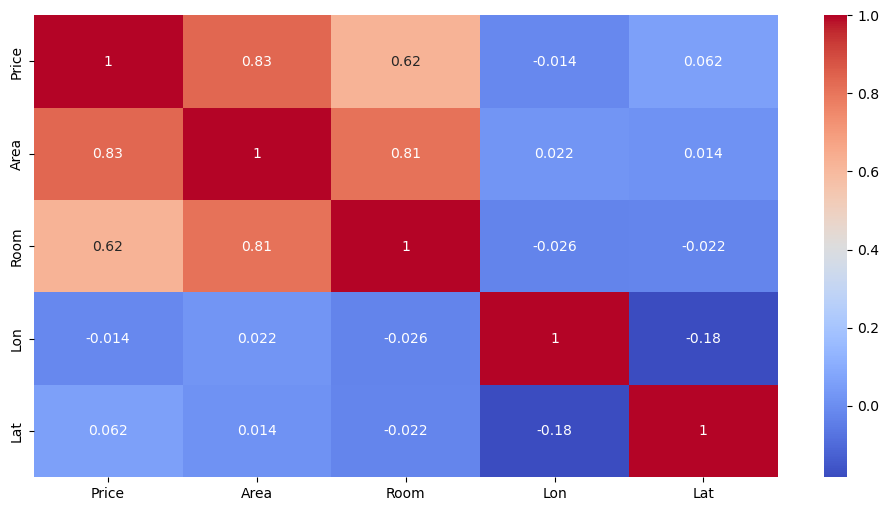

In [167]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(housing_price_df_int.corr(), annot= True, cmap="coolwarm")
plt.show() 

**Nhận xét:**
- Trong sơ đồ heatmap, các cột $Area$ $(0.83)$, $Room$ $(0.62)$ có tương quan mạnh với $Price$. Cho nên 2 cột này là yếu tố chính ảnh hưởng đến giá nhà.

### 6. Hiển thị nhiều tính chất (Multivariate Plots)

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Area', ylabel='Price'>,
        <Axes: xlabel='Room', ylabel='Price'>,
        <Axes: xlabel='Lon', ylabel='Price'>,
        <Axes: xlabel='Lat', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Area'>,
        <Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Room', ylabel='Area'>,
        <Axes: xlabel='Lon', ylabel='Area'>,
        <Axes: xlabel='Lat', ylabel='Area'>],
       [<Axes: xlabel='Price', ylabel='Room'>,
        <Axes: xlabel='Area', ylabel='Room'>,
        <Axes: xlabel='Room', ylabel='Room'>,
        <Axes: xlabel='Lon', ylabel='Room'>,
        <Axes: xlabel='Lat', ylabel='Room'>],
       [<Axes: xlabel='Price', ylabel='Lon'>,
        <Axes: xlabel='Area', ylabel='Lon'>,
        <Axes: xlabel='Room', ylabel='Lon'>,
        <Axes: xlabel='Lon', ylabel='Lon'>,
        <Axes: xlabel='Lat', ylabel='Lon'>],
       [<Axes: xlabel='Price', ylabel='Lat'>,
        <Axes: xlabel='Area', ylab

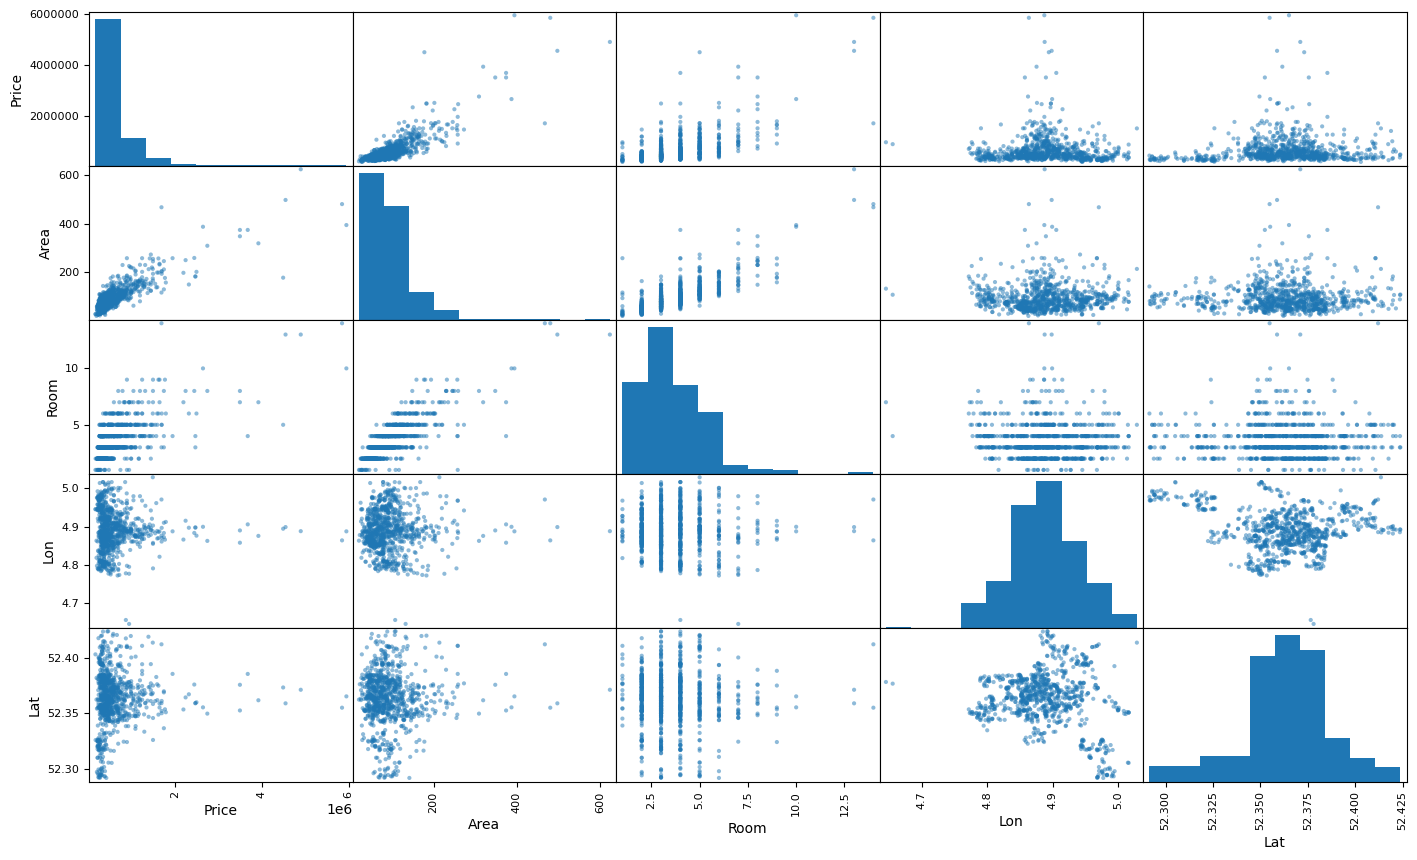

In [171]:
pd.plotting.scatter_matrix(housing_price_df_int, figsize=(17,10))

**Nhận xét:**
- Với việc hiển thị nhiều tính chất thì càng làm rõ mối tương quan giữa các biến ảnh hưởng đến giá nhà.

## II. Thực hiện xây dựng model

### 1. LinearRegressor

#### 1.1. Import thư viện

In [173]:
from sklearn.linear_model import LinearRegression # mô trình hồi quy tuyến tính bậc 1

#### 1.2. Import thư viện

### 2. RandomForestRegressor

### 3.Support Vector Regression (SVR)

# Simple Linear Regression

In [ ]:
housing_price_df_int = housing_price_df[["price", "area","bedrooms", "bathrooms","stories", "parking"]]
housing_price_df_int.head()

price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2

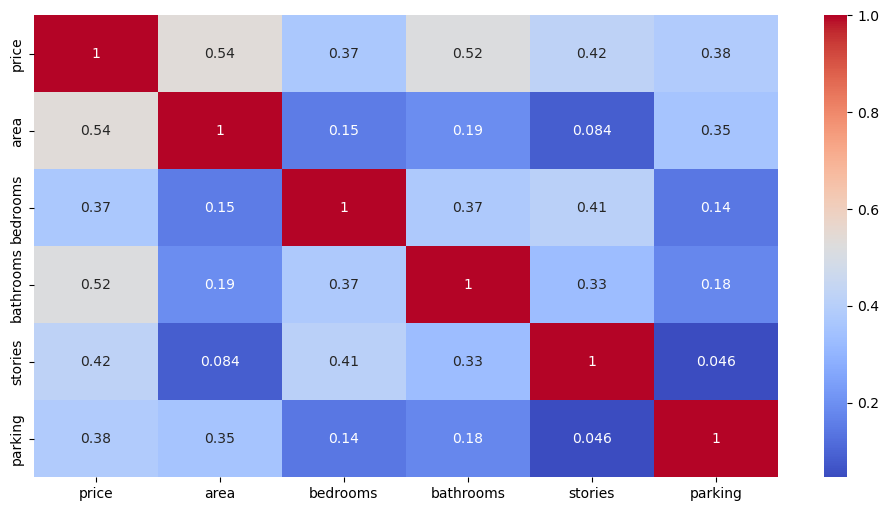

In [ ]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(housing_price_df_int.corr(), annot= True, cmap="coolwarm") # annot(True) hiddend number / cmap is bang mau
plt.show() 

In [ ]:
X = housing_price_df_int[["area","bedrooms", "bathrooms","stories", "parking"]]
y = housing_price_df_int["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [ ]:
X_train.head()

area  bedrooms  bathrooms  stories  parking
46   6000         3          2        4        1
93   7200         3          2        1        3
335  3816         2          1        1        2
412  2610         3          1        2        0
471  3750         3          1        2        0

In [ ]:
# Import metrics (ensure these are available before evaluation)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# --- Model A: Simple Linear Regression ---
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)
y_pred_lin = Linear_model.predict(X_test)

# Metrics for Linear Regression
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(
    f"Linear Regression:\n  MAE={mae_lin:.3f}, MSE={mse_lin:.3f}, RMSE={rmse_lin:.3f}, R2={r2_lin:.4f}"
)

Linear Regression:
  MAE=1127483.352, MSE=2292721545725.362, RMSE=1514173.552, R2=0.5464


In [ ]:
# --- Model B: Polynomial Regression (degree=2) using a pipeline ---
from sklearn.pipeline import make_pipeline
poly_pipe = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)

# Metrics for Polynomial Regression
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(
    f"Polynomial Regression (deg=2):\n  MAE={mae_poly:.3f}, MSE={mse_poly:.3f}, RMSE={rmse_poly:.3f}, R2={r2_poly:.4f}"
)

Polynomial Regression (deg=2):
  MAE=1111158.811, MSE=2326140712528.313, RMSE=1525169.077, R2=0.5398


Model           MAE           MSE          RMSE        R2
0              Linear  1.127483e+06  2.292722e+12  1.514174e+06  0.546406
1  Polynomial (deg=2)  1.111159e+06  2.326141e+12  1.525169e+06  0.539795

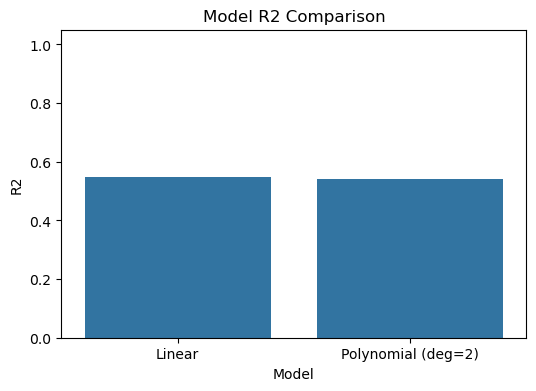

In [ ]:
# --- Compare results side-by-side ---
import pandas as pd
results = pd.DataFrame({
    'Model': ['Linear', 'Polynomial (deg=2)'],
    'MAE': [mae_lin, mae_poly],
    'MSE': [mse_lin, mse_poly],
    'RMSE': [rmse_lin, rmse_poly],
    'R2': [r2_lin, r2_poly]
})

display(results)

# Bar chart for R2 comparison
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='R2', data=results)
plt.ylim(min(0, results['R2'].min() - 0.05), 1.05)
plt.title('Model R2 Comparison')
plt.show()

In [ ]:
# --- Helper predict functions for both models ---
def predict_price_linear(area_m2, bedroom_m2, bathrooms_m2, stories_m, parking_m):
    X_new = pd.DataFrame({"area": [area_m2], "bedrooms": [bedroom_m2], "bathrooms": [bathrooms_m2],  "stories": [stories_m], "parking": [parking_m]})
    return Linear_model.predict(X_new)[0]

def predict_price_poly(area_m2, bedroom_m2, bathrooms_m2, stories_m, parking_m):
    X_new = pd.DataFrame({"area": [area_m2], "bedrooms": [bedroom_m2], "bathrooms": [bathrooms_m2],  "stories": [stories_m], "parking": [parking_m]})
    return poly_pipe.predict(X_new)[0]

# Example usage (change values as needed)
print('Predict (Linear):', predict_price_linear(7420, 4, 2, 3, 2))
print('Predict (Polynomial):', predict_price_poly(7420, 4, 2, 3, 2))

Predict (Linear): 7480866.8694814
Predict (Polynomial): 7558839.8544388255


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred) #y_test gia tri thuc, y_pre cho danh gia
mse = mean_squared_error(y_test, y_pred) # loss model (*) > mae = dao ham () -> Xác định một biến nó tăng/ giảm ở một thời điểm nhất định 
rmse = np.sqrt(mse) # root mean square
r2 = r2_score(y_test, y_pred) #r2 = accuracy model (*) => Linear best

In [ ]:
print(f"MAE: {mae}")

MAE: 1127483.3523235186


In [ ]:
print(f"MSE: {mse}")

MSE: 2292721545725.362


In [ ]:
print(f"RMSE: {rmse}")

RMSE: 1514173.5520492233


In [ ]:
print(f"Model Accuracy: {r2}")  

Model Accuracy: 0.5464062355495872


In [ ]:
def predict_price(area_m2, bedroom_m2, bathrooms_m2, stories_m, parking_m):
    X_new = pd.DataFrame({"area": [area_m2], "bedrooms": [bedroom_m2], "bathrooms": [bathrooms_m2],  "stories": [stories_m], "parking": [parking_m]}) # fit col[area] 
    return pipe.predict(X_new) # print array, had [0] or item()
print(predict_price(7420, 4,2,3,2))

# 13300000	7420	4	2	3	2 


[7558839.85443883]


=> Accuracy quá thấp cho nên kết quả cho mô hình này không tối ưu